***Speech Based Emotion Recognition***

In [ ]:
#Ravdess Dataset is used

In [ ]:
#Here is the link to download the dataset
# https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio

# New Section

In [ ]:
!unzip /content/drive/MyDrive/speech-emotion-recognition-ravdess-data.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#we have to extract features like mfcc, chroma and mel from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# the emotions that are present in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#these emotions to be observed
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size=1-test_size,random_state=9)

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-5.90802185e+02,  5.89666595e+01, -1.06967535e+01, ...,
         5.97229446e-05,  2.71564131e-05,  1.30416265e-05],
       [-5.98661743e+02,  3.96440811e+01, -6.47389698e+00, ...,
         4.85883706e-04,  2.95709149e-04,  8.55728504e-05],
       [-5.10180145e+02,  2.36856041e+01, -8.74777508e+00, ...,
         4.43226798e-03,  2.59895436e-03,  1.08861353e-03],
       ...,
       [-6.35599548e+02,  4.88327255e+01, -1.40954208e+00, ...,
         4.06897561e-05,  1.28932670e-05,  7.19041373e-06],
       [-6.53403809e+02,  4.09788666e+01, -1.12947645e+01, ...,
         9.33741740e-06,  6.86644853e-06,  8.93092965e-06],
       [-5.75087524e+02,  4.44388504e+01,  2.82020617e+00, ...,
         2.22155650e-04,  5.95047641e-05,  3.09308525e-05]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['happy', 'disgust', 'happy', 'calm', 'disgust', 'calm', 'disgust',
       'disgust', 'disgust', 'calm', 'fearful', 'disgust', 'disgust',
       'happy', 'disgust', 'happy', 'disgust', 'disgust', 'disgust',
       'disgust', 'disgust', 'fearful', 'disgust', 'happy', 'happy',
       'calm', 'disgust', 'happy', 'calm', 'fearful', 'calm', 'fearful',
       'fearful', 'calm', 'calm', 'disgust', 'disgust', 'calm', 'disgust',
       'disgust', 'disgust', 'fearful', 'fearful', 'disgust', 'calm',
       'disgust', 'disgust', 'disgust', 'disgust', 'fearful', 'disgust',
       'fearful', 'happy', 'fearful', 'happy', 'happy', 'disgust',
       'disgust', 'happy', 'calm', 'calm', 'disgust', 'happy', 'fearful',
       'fearful', 'disgust', 'calm', 'fearful', 'disgust', 'disgust',
       'disgust', 'happy', 'calm', 'disgust', 'calm', 'calm', 'calm',
       'calm', 'fearful', 'fearful', 'disgust', 'fearful', 'happy',
       'disgust', 'fearful', 'calm', 'fearful', 'disgust', 'disgust',
       '

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.40%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.84090909, 0.75      , 0.68421053, 0.55882353])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[37, 11,  1,  0],
       [ 0, 57,  2,  4],
       [ 2,  7, 26,  6],
       [ 0, 14,  6, 19]])

<Axes: >

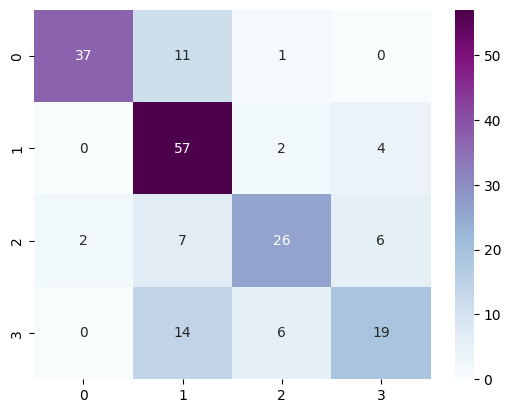

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='BuPu')

In [ ]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print("Testing accuracy :- ",((TP+TN)/(TP+TN+FN+FP))*100,"%")

Testing accuracy :-  89.52380952380953 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.95      0.76      0.84        49
     disgust       0.64      0.90      0.75        63
     fearful       0.74      0.63      0.68        41
       happy       0.66      0.49      0.56        39

    accuracy                           0.72       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.74      0.72      0.72       192



In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,fearful,happy
1,disgust,disgust
2,happy,happy
3,calm,calm
4,disgust,disgust
5,calm,calm
6,fearful,disgust
7,disgust,disgust
8,disgust,disgust
9,calm,calm


In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/drive/MyDrive/Actor_01/03-01-01-01-02-02-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['fearful'], dtype='<U7')